# Exploring real iteration with Python

As we move into our study of dynamics, it will be nice to have a computational aid in our studies. This little document is a [Jupyter notebook](http://jupyter.org/) that should be executed using a Python 3 interpretter. This is not a general intro to Python! There are just a few quick examples illustrating the ideas in our class.

## General comments

Python is a general purpose language. When using it for mathematical exploration, you typically want to import some functionality. I typically have at least the following imports near the top of my notebook.

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import sympy as sp

# Special
from scipy.optimize import newton

In that code, the first two lines import a graphics library and ensure the results will be inline - that is, in the notebook. The `numpy` import imports a fundamental numerical library and the `sympy` import imports a symbolic library. All those imports go into a namespace. Thus, a numpy function will be access like `np.function_name`. This is important because some of the names are the same. For example, `np.sin` is different from `sp.sin`.

As in most computer languages, syntax - like capitalization, spacing, [braces], vs {brackets} vs (parentheses)), tends to be important. Note that code indentation plays a particularly important role in Python, since it's used to enforce code groups. That actually makes it a great introductory language, since it enforces some good habits.

## Examples

### Defining and iterating a function

Let's get right to it! Suppose we want to iterate the function $f(x)=x^2-1$ and view the results. As with most computer languages, iteration is performed in a loop. The easiest type of loop in Python is a `for` loop and looks like so:

In [2]:
for i in range(100):
    "do nothing"

Of course, we want to do *something*, rather than "nothing". Thus, we should define a function $f$, an iterate $x_i$, as the zeroth term in an orbit. Then, our loop will redefine $x_i$ and append the result to the orbit each time through.

In [3]:
def f(x): return x**2 - 1
xi = 1.23
orbit = [xi]
for i in range(25):
    xi = f(xi)
    orbit.append(xi)
orbit

[1.23,
 0.5128999999999999,
 -0.73693359,
 -0.45692888392971187,
 -0.7912159950307479,
 -0.3739772492075035,
 -0.8601410170751889,
 -0.26015743074485964,
 -0.9323181112282336,
 -0.13078293947581898,
 -0.9828958227420642,
 -0.03391580163620067,
 -0.9988497183993739,
 -0.0022992400534915802,
 -0.9999947134951764,
 -1.0572981700041062e-05,
 -0.9999999998882121,
 -2.2357582452059432e-10,
 -1.0,
 0.0,
 -1.0,
 0.0,
 -1.0,
 0.0,
 -1.0,
 0.0]

Looks like we've found an attractive orbit!

### Finding and illustrating fixed points

As we know, a fixed point of f is a point satisfying f(x)=x. Thus, finding fixed points boils down to solving equations and Python has a number of tools for doing so. The most simplest to use is `solve` from the sympy library. Sympy is fairly weak, though, compared to Mathematica. Scipy, by contrast, as very strong numerical routines. They are a little harder to use but often we must call on those. 

Here's how to use use Sympy's `solve` to find the fixed points of $f(x)=x^2-1$.

In [4]:
x = sp.var('x')
def f(x): return x**2-1
x1,x2 = sp.solve(f(x)-x, x)
x1,x2

(1/2 + sqrt(5)/2, -sqrt(5)/2 + 1/2)

Two comments are in order. First, note that we had to declare `x` to be a symbolic variable. Second, `solve` assumes the input is zero so that equations are often expressed as differences.

OK, now let's plot the results with Matplotlib which, like it's name, is a bit too cumbersome.

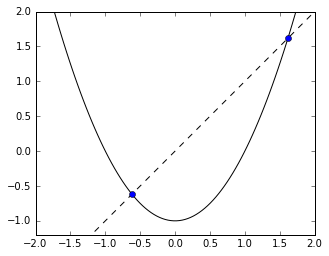

In [5]:
xs = np.linspace(-2,2,100) # list of x-coordinates
ys = f(xs) # list of y coordinates
plt.plot(xs,ys, color='black') # plot y = f(x)
plt.plot(xs,xs, '--', color='black') # plot y=x
plt.plot([x1,x2],[x1,x2],'o') # add the points of intersection
ax = plt.gca() # grab a reference to the axes
ax.set_aspect(1) # set the aspect ratio
ax.set_xlim(-2,2) # set the xlim
ax.set_ylim(-1.2,2) # set the ylim

fig = plt.gcf() # grab a reference to the current figure
fig.savefig('my_picture.png') # save the figure in a separate file.

## Fiddle

In [25]:
from scipy import random
import numpy as np
import sympy as sp
random.seed(1)
randy = random.randint(2,size=29)
x = sum([sp.S(int(randy[i]))/2**(i+1) for i in range(len(randy))])
x

435341457/536870912

In [38]:
x0 = 2*np.cos(2*np.pi*float(x))
x0

0.74659720739034674

In [39]:
xi = x0
for i in range(29):
    xi = xi**2 - 2
    print(xi)

-1.44259260992
0.081073438187
-1.99342709762
1.97375159353
1.89569535295
1.59366087121
0.539754972428
-1.70866456974
0.919534611882
-1.15445609755
-0.667231118827
-1.55480263407
0.417411230908
-1.82576786431
1.33342829436
-0.221968983813
-1.95072977022
1.80534663644
1.25927647771
-0.414222752681
-1.82841951116
1.34311790879
-0.196034283076
-1.96157055986
1.84775906131
1.41421354864
-3.88545418062e-08
-2.0
2.0


In [33]:
type(1.23)

float

In [34]:
type(x.evalf())

sympy.core.numbers.Float

In [36]:
float(x)

0.8108866531401873